<a href="https://colab.research.google.com/github/vlsantos-bit/Teste-Radar/blob/master/Plot_Radar%20image%20in%20Google%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install cartopy
!pip install arm-pyart
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!!pip install netCDF4


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


['Requirement already satisfied: netCDF4 in /usr/local/lib/python3.6/dist-packages (1.5.3)',
 'Requirement already satisfied: numpy>=1.7 in /usr/local/lib/python3.6/dist-packages (from netCDF4) (1.17.5)',
 'Requirement already satisfied: cftime in /usr/local/lib/python3.6/dist-packages (from netCDF4) (1.0.4.2)']

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyart


In [36]:
!wget https://github.com/vlsantos-bit/Teste-Radar.git

--2020-01-16 21:31:17--  https://github.com/vlsantos-bit/Teste-Radar.git
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/vlsantos-bit/Teste-Radar [following]
--2020-01-16 21:31:18--  https://github.com/vlsantos-bit/Teste-Radar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Teste-Radar.git.5’

Teste-Radar.git.5       [ <=>                ]  71.51K  --.-KB/s    in 0.05s   

2020-01-16 21:31:18 (1.38 MB/s) - ‘Teste-Radar.git.5’ saved [73226]



In [0]:
filename = 'PEL191215063034.RAWBPKC'


In [0]:
radar = pyart.io.read(filename)


In [39]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (1620,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (1620,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	reflectivity:
		data: <ndarray of type: float32 and shape: (1620, 960)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Reflectivity
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	velocity:
		data: <ndarray of type: float32 and shape: (1620, 960)>
		units: meters_p

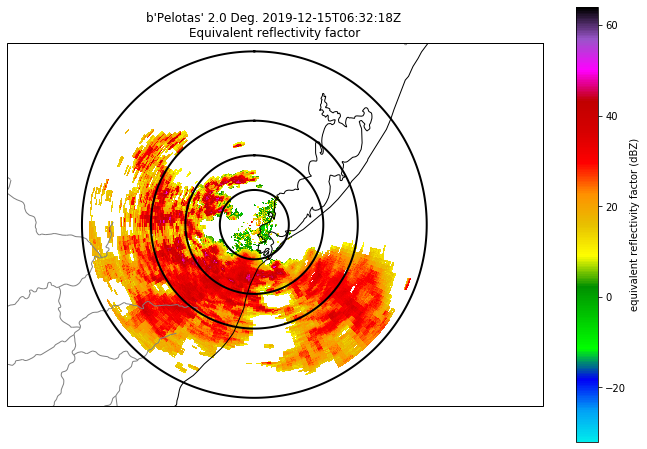

In [40]:
#Definindo a projeção e incluindo as lat e lon de onde esta o radar.

projection = ccrs.Orthographic(
    central_longitude=radar.longitude['data'][0],
    central_latitude=radar.latitude['data'][0])

#Definindo tamanho da imagem 

fig = plt.figure(figsize = (12,8))

#Criando o gráfico de campo do radar

dc = pyart.graph.RadarMapDisplay(radar)
ax = fig.add_subplot(111, projection=projection)

#Configurando o produto de refletividade do radar atribuindo seus valores máximos e mínimos.
#Configurando lat e lon para projeção do ccrs.Orthographic 

dc.plot_ppi_map('reflectivity',3, vmin= -32, vmax=64., min_lon=-56, max_lon=-48, min_lat=-34, max_lat=-29.3, cmap='pyart_NWSRef',
                ax=ax, fig=fig, resolution='10m')

#Configurando os circulos projetados nas imagens
dc.plot_range_rings([50, 100, 150, 250])

#plotar a figura

plt.show()